In [1]:
pip install plot3d

In [8]:
from plot3d import read_plot3D, write_plot3D,Block
import pickle
import pprint

In [14]:
# Convert to binary because of size
blocks = read_plot3D('Test.p3d', binary = False)
print(blocks)
write_plot3D('finalmesh-ASCII.xyz',blocks, binary=True)

100%|██████████| 1/1 [00:00<00:00, 2285.72it/s]

In [15]:
for block in blocks:
    print(dir(blocks[0]))

['IMAX', 'JMAX', 'KMAX', 'X', 'Y', 'Z', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'cell_volumes', 'cx', 'cy', 'cylindrical', 'cz', 'scale', 'shift']


In [16]:
from plot3d import read_plot3D
import numpy as np

blocks = read_plot3D('Test.p3d', binary=False)

for block in blocks:

    print("Block Dimention (IMAX, JMAX, KMAX):", block.IMAX, block.JMAX, block.KMAX)

    num_points = block.IMAX * block.JMAX * block.KMAX
    print("Total Number of nodes:", num_points)

    print("X coordinates:", block.X)
    print("Y coordinates:", block.Y)
    print("Z coordinates:", block.Z)

100%|██████████| 1/1 [00:00<00:00, 2924.90it/s]

Block Dimention (IMAX, JMAX, KMAX): 2 2 2
Total Number of nodes: 8
X coordinates: [[[0. 1.]
  [0. 1.]]

 [[0. 1.]
  [0. 1.]]]
Y coordinates: [[[0. 0.]
  [1. 1.]]

 [[0. 0.]
  [1. 1.]]]
Z coordinates: [[[0. 0.]
  [0. 0.]]

 [[1. 1.]
  [1. 1.]]]


In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np

def plot_block_outline(block:Block,ax:axes3d):
  IMAX,JMAX,KMAX = block.X.shape
  X = block.X
  Y = block.Y
  Z = block.Z

  for i in [0,IMAX-1]:    # Plots curves at constant I bounds
    for j in [0,JMAX-1]:
      x = X[i,j,:]
      y = Y[i,j,:]
      z = Z[i,j,:]
      ax.plot3D(x,y,z)
  for j in [0,JMAX-1]:    # Plots curves at constant I bounds
      for k in [0,KMAX-1]:
        x = X[:,j,k]
        y = Y[:,j,k]
        z = Z[:,j,k]
        ax.plot3D(x,y,z)
  for i in [0,IMAX-1]:    # Plots curves at constant I bounds
      for k in [0,KMAX-1]:
        x = X[i,:,k]
        y = Y[i,:,k]
        z = Z[i,:,k]
        ax.plot3D(x,y,z)


we have 1 blocks


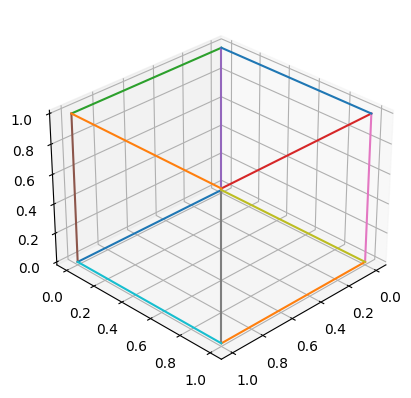

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_block_outline(blocks[0],ax)
# plot_block_outline(blocks[1],ax)
ax.view_init(30,45)

print("we have " + str(len(blocks)) + " blocks")